In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.style.use('seaborn')
from matplotlib import pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



<h1> Load the data

In [2]:
# Load the data from the csv files

train_data = pd.read_csv("preprocessed_train.csv", index_col="index")
test_data = pd.read_csv("preprocessed_test.csv", index_col="index")

In [3]:
target = "change_type"
X = train_data.drop(columns = target)
Y = train_data[target].map({'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True)

<h1> 5 Models for 1 Prediction

<h2> Dataset 1

In [8]:
n = y_train.value_counts()
n

2    123230
3     74660
0     22220
1     11151
4      1148
5        95
Name: change_type, dtype: int64

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def new_sampling(X, y, strategy):
    strat_under = {}

    for cat, nb in strategy.items():
        if nb < np.unique(y, return_counts=True)[1][cat]:
            strat_under[cat] = nb
        else : 
            strat_under[cat] = np.unique(y, return_counts=True)[1][cat]
    X, y = RandomUnderSampler(sampling_strategy=strat_under).fit_resample(X, y)
    X, y = RandomOverSampler(sampling_strategy=strategy).fit_resample(X, y)

    return X, y

In [9]:
k = n[0]*4
strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train0, y_train0 = new_sampling(X_train, y_train, strategy)
y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (88880) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22220)
  warnings.warn(


In [10]:
k = n[1]*7
strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train1, y_train1 = new_sampling(X_train, y_train, strategy)
y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (78057) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15611)
  warnings.warn(


In [11]:
k = n[2]//2
strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train2, y_train2 = new_sampling(X_train, y_train, strategy)
y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)


In [12]:
k = n[3]
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

X_train3, y_train3 = new_sampling(X_train, y_train, strategy)
y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)


In [13]:
k = n[4]*15
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
X_train4, y_train4 = new_sampling(X_train, y_train, strategy)
y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (17220) in class 4 will be larger than the number of samples in the majority class (class #0 -> 3444)
  warnings.warn(


In [14]:
k = n[5]*30
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

X_train5, y_train5 = new_sampling(X_train, y_train, strategy)
y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2850) in class 5 will be larger than the number of samples in the majority class (class #0 -> 570)
  warnings.warn(


<h2> Model 1

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf0 = RandomForestClassifier().fit(X_train0, y_train0)
clf1 = RandomForestClassifier().fit(X_train1, y_train1)
clf2 = RandomForestClassifier().fit(X_train2, y_train2)
clf3 = RandomForestClassifier().fit(X_train3, y_train3)
clf4 = RandomForestClassifier().fit(X_train4, y_train4)
clf5 = RandomForestClassifier().fit(X_train5, y_train5)

In [43]:
y_pred = clf0.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==0 else 0)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     70130
           1       0.70      0.95      0.81      7372

    accuracy                           0.96     77502
   macro avg       0.85      0.95      0.89     77502
weighted avg       0.97      0.96      0.96     77502



In [44]:
y_pred = clf1.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==1 else 0)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     73726
           1       0.41      0.78      0.54      3776

    accuracy                           0.94     77502
   macro avg       0.70      0.86      0.75     77502
weighted avg       0.96      0.94      0.94     77502



In [45]:
y_pred = clf2.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==2 else 0)))

              precision    recall  f1-score   support

           0       0.82      0.59      0.68     36385
           1       0.71      0.88      0.79     41117

    accuracy                           0.74     77502
   macro avg       0.76      0.73      0.73     77502
weighted avg       0.76      0.74      0.74     77502



In [46]:
y_pred = clf3.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==3 else 0)))

              precision    recall  f1-score   support

           0       0.91      0.49      0.64     52672
           1       0.46      0.90      0.61     24830

    accuracy                           0.62     77502
   macro avg       0.68      0.70      0.62     77502
weighted avg       0.77      0.62      0.63     77502



In [47]:
y_pred = clf4.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==4 else 0)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     77123
           1       0.09      0.44      0.15       379

    accuracy                           0.98     77502
   macro avg       0.54      0.71      0.57     77502
weighted avg       0.99      0.98      0.98     77502



In [48]:
y_pred = clf5.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==5 else 0)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77474
           1       0.02      0.14      0.04        28

    accuracy                           1.00     77502
   macro avg       0.51      0.57      0.52     77502
weighted avg       1.00      1.00      1.00     77502



In [58]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred

array([[0.  , 0.01, 0.02, ..., 0.1 , 0.  , 0.01],
       [0.07, 0.02, 0.02, ..., 0.17, 0.12, 0.  ],
       [0.93, 0.99, 0.98, ..., 0.86, 0.9 , 0.35],
       [0.47, 0.42, 0.43, ..., 0.49, 0.65, 1.  ],
       [0.19, 0.02, 0.  , ..., 0.05, 0.02, 0.02],
       [0.09, 0.01, 0.  , ..., 0.04, 0.04, 0.03]])

In [63]:
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      7372
           1       0.57      0.67      0.62      3776
           2       0.84      0.71      0.77     41117
           3       0.61      0.69      0.65     24830
           4       0.15      0.28      0.19       379
           5       0.10      0.14      0.12        28

    accuracy                           0.72     77502
   macro avg       0.50      0.57      0.53     77502
weighted avg       0.74      0.72      0.72     77502



In [72]:
confusion_matrix(y_test, y_pred)

array([[ 6895,    55,    91,   324,     7,     0],
       [   27,  2531,   224,   981,    13,     0],
       [ 1629,   589, 29030,  9630,   216,    23],
       [  843,  1222,  5251, 17125,   379,    10],
       [   12,    15,    90,   155,   105,     2],
       [    1,     1,     9,    13,     0,     4]], dtype=int64)

In [31]:
# A SUPPRIMER QUAND J'AURAIS CORRIGE LE PREPROCESS SUR LINUX
test_data = test_data.drop(columns=["change_type"])

In [ ]:
# For submission

y_pred_final = np.array([clf0.predict_proba(test_data)[:, 1], clf1.predict_proba(test_data)[:, 1], clf2.predict_proba(test_data)[:, 1], clf3.predict_proba(test_data)[:, 1], clf4.predict_proba(test_data)[:, 1], clf5.predict_proba(test_data)[:, 1]])
y_pred_final = y_pred_final.argmax(axis = 0)

In [69]:
pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("first_sample_submission.csv", index=True, index_label='Id')

<h2> Model 2

In [6]:
from lightgbm import LGBMClassifier


In [ ]:
from lightgbm import LGBMClassifier

clf0 = LGBMClassifier().fit(X_train0, y_train0)
clf1 = LGBMClassifier().fit(X_train1, y_train1)
clf2 = LGBMClassifier().fit(X_train2, y_train2)
clf3 = LGBMClassifier().fit(X_train3, y_train3)
clf4 = LGBMClassifier().fit(X_train4, y_train4)
clf5 = LGBMClassifier().fit(X_train5, y_train5)

In [29]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      7518
           1       0.52      0.83      0.64      3869
           2       0.85      0.70      0.77     40890
           3       0.62      0.64      0.63     24802
           4       0.09      0.51      0.16       384
           5       0.01      0.10      0.02        39

    accuracy                           0.71     77502
   macro avg       0.47      0.62      0.51     77502
weighted avg       0.75      0.71      0.72     77502



array([[ 7094,    58,    72,   263,    24,     7],
       [   19,  3206,   136,   466,    36,     6],
       [ 1614,   959, 28655,  8834,   682,   146],
       [  870,  1917,  4769, 15971,  1135,   140],
       [    8,    18,    74,    82,   196,     6],
       [    1,     3,    14,    10,     7,     4]], dtype=int64)

In [32]:
# For submission

y_pred_final = np.array([clf0.predict_proba(test_data)[:, 1], clf1.predict_proba(test_data)[:, 1], clf2.predict_proba(test_data)[:, 1], clf3.predict_proba(test_data)[:, 1], clf4.predict_proba(test_data)[:, 1], clf5.predict_proba(test_data)[:, 1]])
y_pred_final = y_pred_final.argmax(axis = 0)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("second_sample_submission.csv", index=True, index_label='Id')

<h2> Data 2

In [22]:
k = n[0]*4

y_train0 = y_train.apply(lambda x : 1 if x == 0 else 0)
strategy = {0 : k, 1 : k}

X_train0, y_train0 = new_sampling(X_train, y_train0, strategy)


In [23]:
k = n[1]*7

y_train1 = y_train.apply(lambda x : 1 if x == 1 else 0)
strategy = {0 : k, 1 : k}

X_train1, y_train1 = new_sampling(X_train, y_train1, strategy)


In [24]:
k = n[2]//2

y_train2 = y_train.apply(lambda x : 1 if x == 2 else 0)
strategy = {0 : k, 1 : k}

X_train2, y_train2 = new_sampling(X_train, y_train2, strategy)


In [25]:
k = n[3]

y_train3 = y_train.apply(lambda x : 1 if x == 3 else 0)
strategy = {0 : k, 1 : k}

X_train3, y_train3 = new_sampling(X_train, y_train3, strategy)


In [26]:
k = n[4]*15

y_train4 = y_train.apply(lambda x : 1 if x == 4 else 0)
strategy = {0 : k, 1 : k}

X_train4, y_train4 = new_sampling(X_train, y_train4, strategy)


In [27]:
k = n[5]*30

y_train5 = y_train.apply(lambda x : 1 if x == 5 else 0)
strategy = {0 : k, 1 : k}

X_train5, y_train5 = new_sampling(X_train, y_train5, strategy)


<h2> Model 3

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf0 = GradientBoostingClassifier().fit(X_train0, y_train0)
clf1 = GradientBoostingClassifier().fit(X_train1, y_train1)
clf2 = GradientBoostingClassifier().fit(X_train2, y_train2)
clf3 = GradientBoostingClassifier().fit(X_train3, y_train3)
clf4 = GradientBoostingClassifier().fit(X_train4, y_train4)
clf5 = GradientBoostingClassifier().fit(X_train5, y_train5)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      7518
           1       0.42      0.80      0.55      3869
           2       0.81      0.68      0.74     40890
           3       0.58      0.51      0.54     24802
           4       0.07      0.45      0.13       384
           5       0.00      0.23      0.01        39

    accuracy                           0.66     77502
   macro avg       0.44      0.60      0.47     77502
weighted avg       0.71      0.66      0.67     77502

[[ 7065    57    83   234    33    46]
 [   16  3077   235   477    35    29]
 [ 1630  1237 27788  8291   911  1033]
 [  872  2919  6184 12663  1228   936]
 [    9    28    96    61   173    17]
 [    1     3    15     8     3     9]]


<AxesSubplot:>

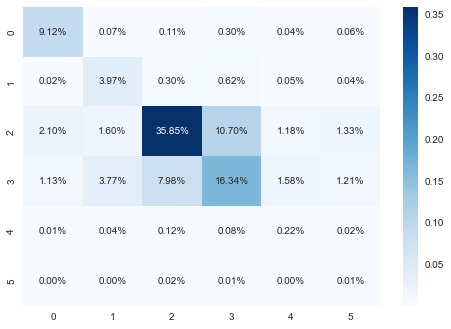

In [37]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

<h2> Short summary for the moment

No matter how we created the data, and the model, it seems that there are big confusions: 
- class 2 is predicted as class 0
- between class 2 and 3
- class 5 has really big troubles ==> especially class 5 often predicted as class 2 and 3
- class 3 predicted as class 1
- class 4 often predicted as class 2 and 3

<h1> New model with class

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


class GigaClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self):
        self.clf0 = LGBMClassifier()
        self.clf1 = LGBMClassifier()
        self.clf2 = LGBMClassifier()
        self.clf3 = LGBMClassifier()
        self.clf4 = LGBMClassifier()
        self.clf5 = LGBMClassifier()

        self.clf23 = LGBMClassifier()


    def fit(self, X, y):
        X, _ = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
    
        _, n = np.unique(self.y_, return_counts=True)
        
        # Classifier 0
        k = n[0]*4
        strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train0, y_train0 = new_sampling(self.X_, self.y_, strategy)
        y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)

        self.clf0 = self.clf0.fit(X_train0, y_train0)
        
        # Classifier 1
        k = n[1]*7
        strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train1, y_train1 = new_sampling(self.X_, self.y_, strategy)
        y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

        self.clf1 = self.clf1.fit(X_train1, y_train1)
        
        # Classifier 2
        k = n[2]//2
        strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train2, y_train2 = new_sampling(self.X_, self.y_, strategy)
        y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)

        self.clf2 = self.clf2.fit(X_train2, y_train2)
        
        # Classifier 3
        k = n[3]
        strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

        X_train3, y_train3 = new_sampling(self.X_, self.y_, strategy)
        y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)

        self.clf3 = self.clf3.fit(X_train3, y_train3)
        
        # Classifier 4
        k = n[4]*15
        strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
        X_train4, y_train4 = new_sampling(self.X_, self.y_, strategy)
        y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

        self.clf4 = self.clf4.fit(X_train4, y_train4)
        
        # Classifier 5
        k = n[5]*30
        strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

        X_train5, y_train5 = new_sampling(self.X_, self.y_, strategy)
        y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)

        self.clf5 = self.clf5.fit(X_train5, y_train5)

        # Classifier 2-3

        mask = (self.y_ >= 2)&(self.y_ <= 3)
        X_train_23 = self.X_[mask]
        y_train_23 = self.y_[mask].apply(lambda x : 0 if x == 2 else 1)

        self.clf23 = RandomForestClassifier(class_weight="balanced").fit(X_train_23, y_train_23)

        # # Final classifier

        # self.final = LogisticRegression().fit(np.array([self.clf0.predict_proba(self.X_)[:, 1], self.clf1.predict_proba(self.X_)[:, 1], self.clf2.predict_proba(self.X_)[:, 1], self.clf3.predict_proba(self.X_)[:, 1], self.clf4.predict_proba(self.X_)[:, 1], self.clf5.predict_proba(self.X_)[:, 1], self.clf23.predict_proba(self.X_)[:, 1]]).T, self.y_)

        return self

    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        y_pred = np.array([self.clf0.predict_proba(X)[:, 1], self.clf1.predict_proba(X)[:, 1], self.clf2.predict_proba(X)[:, 1], self.clf3.predict_proba(X)[:, 1], self.clf4.predict_proba(X)[:, 1], self.clf5.predict_proba(X)[:, 1]])
        y_pred = y_pred.argmax(axis = 0)

        y_23 = self.clf23.predict(X)

        print(y_pred.shape)
        for i in range(len(y_pred)):
            if y_pred[i] == 2 or y_pred[i] ==3:
                y_pred[i] = int(y_23[i])
                if y_pred[i] == 0:
                    y_pred[i] = 2
                else:
                    y_pred[i] = 3

        #y_pred = self.final.predict(np.array([self.clf0.predict_proba(X)[:, 1], self.clf1.predict_proba(X)[:, 1], self.clf2.predict_proba(X)[:, 1], self.clf3.predict_proba(X)[:, 1], self.clf4.predict_proba(X)[:, 1], self.clf5.predict_proba(X)[:, 1], self.clf23.predict_proba(X)[:, 1]]).T)

        return y_pred

In [8]:
model = GigaClassifier()
model = model.fit(X_train, y_train)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (88824) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22206)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (79079) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15815)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (17220) in class 4 will be larger than the number of samples in the majority class (class #0 -> 3444)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number 

In [9]:
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
confusion_matrix(y_pred, y_test)

(77502,)
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      9823
           1       0.86      0.43      0.58      7332
           2       0.75      0.80      0.77     38444
           3       0.48      0.68      0.56     17475
           4       0.65      0.06      0.11      4026
           5       0.26      0.02      0.04       402

    accuracy                           0.69     77502
   macro avg       0.66      0.45      0.48     77502
weighted avg       0.72      0.69      0.68     77502



array([[ 7152,    21,  1663,   978,     8,     1],
       [   57,  3189,  1325,  2739,    18,     4],
       [  124,   225, 30680,  7355,    50,    10],
       [  151,   234,  5094, 11940,    53,     3],
       [   43,    40,  1986,  1701,   249,     7],
       [    5,    14,   218,   150,     6,     9]], dtype=int64)

In [52]:
test_data = test_data.drop(columns = ["change_type"])

In [57]:
# For submission

y_pred_final = model.predict(test_data)
print(y_pred_final.shape)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("fourth_sample_submission.csv", index=True, index_label='Id')

(121704,)
(121704,)


Note : 1) C'était mieux avec Logistic 2) Faut vraiment bosser sur comment différencier 2 et 3